# Graph Visualization and Result Analysis for Keyword Cipher

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from csv import reader

x = []    # no. of words
y = []    # Time in ms


with open('sizeVariation_time_Scratch.txt', 'r') as file:
    data = reader(file, delimiter=' ')
    transposed = (list(item) for item in zip(*data))
    

y,x = transposed

In [4]:
y = list(map(int,y))

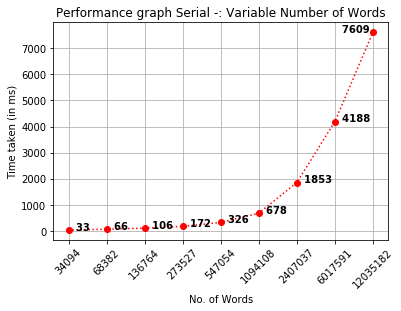

In [60]:
plt.plot(x,y,'ro:')
plt.grid(True)
plt.xlabel('No. of Words')
plt.ylabel('Time taken (in ms)')

plt.title('Performance graph Serial -: Variable Number of Words')
plt.xticks(rotation=45)
for i in range(len(x)):
    s = "  "
    s += str(y[i])
    if(i==8):
        plt.text(7,y[i],s,fontweight='bold')
        break;
    plt.text(x[i],y[i],s,fontweight=551)
plt.show()


In [28]:
print(y)
print(x)

[33, 66, 10, 172, 326, 678, 1853, 4188, 7609]
['34094', '68382', '136764', '273527', '547054', '1094108', '2407037', '6017591', '12035182']


In [22]:
from csv import reader

z = []    # no. of words
p = []    # Time


with open('sizeVariation_time_stringScratch.txt', 'r') as file:
    data = reader(file, delimiter=' ')
    transposed = (list(item) for item in zip(*data))

p,z=transposed

In [23]:
p = list(map(int, p))

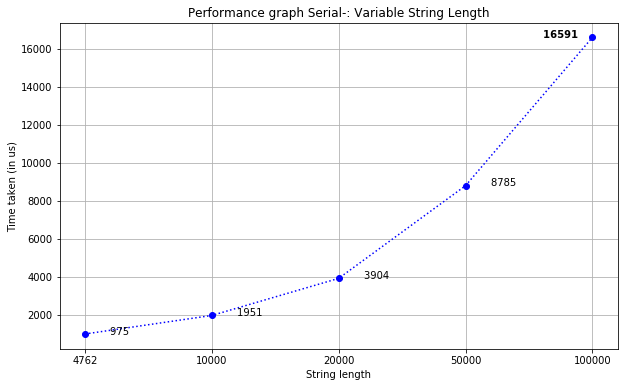

In [91]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.grid(True)
ax.plot(z,p,'bo:')
# plt.plot(x,y2,)

plt.xlabel('String length')
plt.ylabel('Time taken (in us)')

plt.title('Performance graph Serial-: Variable String Length')
# plt.xticks(rotation=45)
for i in range(len(z)):
    s = "        "
    s += str(p[i])
    if(i==4):
        s = "                      "
        s += str(p[i])    
        plt.text(3,p[i],s,fontweight=551)
        break
    plt.text(z[i],p[i],s)
plt.show()

In [61]:
from csv import reader

time = []    # Time us
threads = []    # Threads


with open('Threads_variation_time_stringScratch.txt', 'r') as file:
    data = reader(file, delimiter=' ')
    transposed = (list(item) for item in zip(*data))
    

time,threads=transposed

In [62]:
time = list(map(int, time))

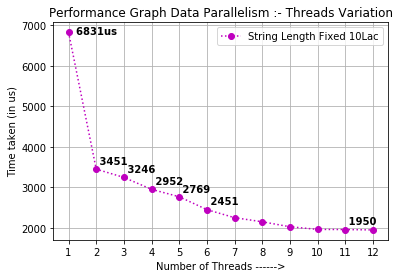

In [95]:
# plt.axis([0,12 ,1000,8000])
plt.grid(True)
plt.plot(threads,time, "mo:")
# print(plt.style.available)

plt.xlabel('Number of Threads ------>')
plt.ylabel('Time taken (in us)')

plt.title('Performance Graph Data Parallelism :- Threads Variation')
plt.legend(['String Length Fixed 10Lac'],loc ="upper right")
# plt.xticks(rotation=45)   
for i in range(len(threads)):
    if(i!=0 and i<6):
        s = " "
        s += str(time[i])
        plt.text(threads[i],time[i]+125,s,fontweight=551)
    elif(i==11):
        s = " "
        s += str(time[i])
        plt.text(10,time[i]+150,s,fontweight=551)
    elif(i==0):
        s = "  "
        s += str(time[i])
        plt.text(threads[i],time[i]-50,s+'us',fontweight=551)
plt.show()

## Fixed String Length data Parallelism 8.4x faster than serial Implementation

In [96]:
from csv import reader

words = []    # no. of words
time_2 = []    # Time


with open('Task_sizeVariation_time_Scratch.txt', 'r') as file:
    data = reader(file, delimiter=' ')
    transposed = (list(item) for item in zip(*data))
   

time_2,words=transposed

In [97]:
time_2 = list(map(int, time_2))

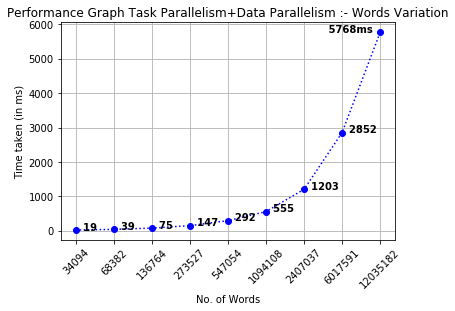

In [134]:
plt.grid(True)
plt.plot(words,time_2,"bo:")
plt.xlabel('No. of Words')
plt.ylabel('Time taken (in ms)')

plt.title('Performance Graph Task Parallelism+Data Parallelism :- Words Variation')


plt.xticks(rotation=45)
for i in range(len(words)):
    if(i==8):
        s = "       "
        s += str(time_2[i])
    
        plt.text(6,time_2[i],s+'ms',fontweight=551)
        break;
    s = "  "
    s += str(time_2[i])
    
    plt.text(words[i],time_2[i],s,fontweight=551)
    
plt.show()

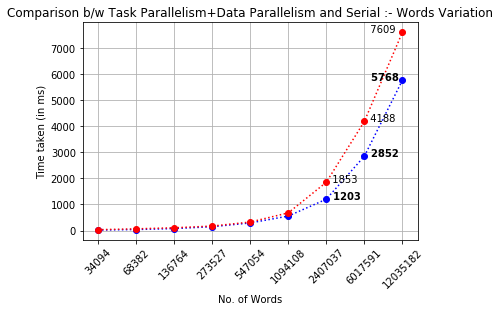

In [126]:
plt.grid(True)
plt.plot(words,time_2,"bo:")
plt.plot(x,y,"ro:")
plt.xlabel('No. of Words')
plt.ylabel('Time taken (in ms)')

plt.title('Comparison b/w Task Parallelism+Data Parallelism and Serial :- Words Variation')
plt.xticks(rotation=45)
for i in range(len(words)):
    if(i<6):
        continue
    elif(i==8):
        s = "  "
        s1 = "  "
        s+=str(time_2[i])
        s1+=str(y[i])
        plt.text(7,time_2[i],s,fontweight='bold',fontfamily="sans-serif")
        plt.text(7,y[i],s1)
        break;
    s = "  "
    s1 = "  "
    s+=str(time_2[i])
    s1+=str(y[i])
    plt.text(words[i],time_2[i],s,fontweight='bold')
    plt.text(words[i],y[i],s1,fontweight='regular')
plt.show()

## Task Parallelism + Data Parallelism 1.4x faster from Serial (Encryption/Decryption)

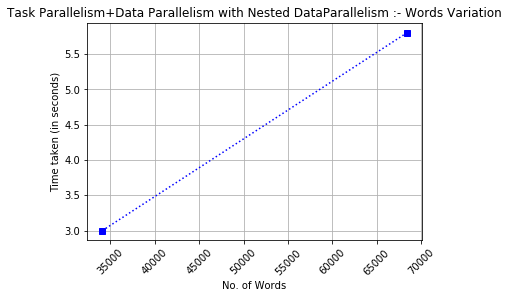

In [127]:
words_2 = [34094,68382]
time_3 = [3,5.8]
plt.grid(True)
plt.plot(words_2,time_3,"bs:")
plt.xlabel('No. of Words')
plt.ylabel('Time taken (in seconds)')

plt.title('Task Parallelism+Data Parallelism with Nested DataParallelism :- Words Variation')


plt.xticks(rotation=45)
plt.show()

Approach took around 3s for just 35k words this is because of nested data parallelism. The complexity of scheduling and creating threads is higher than the computation taking place in our encryption decryption function.    
This is due to the fact that string length at max is of 20char which is very less for multithreading to show its power, it is also evident from the above graphs that multithreading starts performing better than Serial approach from around 10 Lac char per string length.